# PHYS 267 Final Project: Physics Education Research
**Team: Devejya Raghuvanshi, Kevin Bacabac**


## Introduction

NOTES:
- Data Preprocessing Note
    - Note that Likert type scale is converted to 0 to 5 in the data collection process.
    - Since our main question and hypothesis refer to an overall change in students attitude. Therefore, instead of analysing the students answer for each question, we use the calculate an overall student attitude metric to compare pre and post lab.
    - The Student Attitude Metric is a weighted sum of scores for each of the questions answered by a particular student. A weight of +1 or -1 is assigned to the score for each question. The weight if +1 if higher score for that question indicates positive attitude by the students towards the lab, and weight -1 otherwise.
    - This assumes each question has the same importance.




## Results

In [5]:
import pandas as pd 
import numpy as np

# Read Data
prelab = pd.read_excel("PHYS267_DataSet_PER.xlsx", sheet_name=0)
postlab = pd.read_excel("PHYS267_DataSet_PER.xlsx", sheet_name=1)


In [3]:

d = {}
d["Q1"] = pd.DataFrame(columns=["1", "2", "3", "4", "5"],\
    data=prelab[[1,'Unnamed: 3',
         'Unnamed: 4','Unnamed: 5','Unnamed: 6']].values[1:]
)
d["Q2"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10" ,"11"],\
    data=prelab[[2,
        'Unnamed: 8',  'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17']].values[1:]
)
d["Q3"] = pd.DataFrame(columns=["1", "2", "3", "4"],\
    data=prelab[[3, 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21']].values[1:]
)
d["Q4"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=prelab[[4, 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28']].values[1:]
)
d["Q5"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=prelab[[5, 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35']].values[1:]
)
prelab_studentnum = prelab['Unnamed: 0'][1:].values
prelab_q = pd.concat(d, axis=1)
prelab_q.index = prelab_studentnum
print('rows with na values = ',prelab_q.isna().any(axis=1).sum(), "shape of pre-lab q is ", prelab_q.shape)


rows with na values =  125 shape of pre-lab q is  (248, 34)


In [6]:
import matplotlib.pyplot as plt
d2 = {}
d2["Q1"] = pd.DataFrame(columns=["1", "2", "3", "4", "5"],\
    data=postlab[[1,'Unnamed: 3',
         'Unnamed: 4','Unnamed: 5','Unnamed: 6']].values[1:]
)
d2["Q2"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10" ,"11"],\
    data=postlab[[2,
        'Unnamed: 8',  'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17']].values[1:]
)
d2["Q3"] = pd.DataFrame(columns=["1", "2", "3", "4"],\
    data=postlab[[3, 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21']].values[1:]
)
d2["Q4"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=postlab[[4, 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28']].values[1:]
)
d2["Q5"] = pd.DataFrame(columns=["1", "2", "3", "4", "5", "6", "7"],\
    data=postlab[[5, 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35']].values[1:]
)
postlab_studentnum = postlab['Unnamed: 0'][1:].values
postlab_q = pd.concat(d2, axis=1)
postlab_q.index = postlab_studentnum
print('rows with na values = ',postlab_q.isna().any(axis=1).sum(), "shape of pre-lab q is ", postlab_q.shape)
# Dropping all rows with any NaN values
postlab_q.dropna(inplace=True)
prelab_q.dropna(inplace=True)


rows with na values =  137 shape of pre-lab q is  (260, 34)


## Exploratory Data Analysis (EDA)

#### Steps:
* Data Visualization. (eg. Histograms, Piecharts, Line Plots)
* Distribution Statistics. (eg. Moments of the distribution)

The EDA also includes a small discussion regarding the observations from the exploration.

### EDA Step 1: Data Visualization:

Since our data is categorical (ordinal, answers to likert type questions). We are interested in the frequency of each answer per question. Therefore, before visualizing the data, we process it to contain only the frequencies.



In [66]:
# Data Preprocessing 

# Frequency Table (TODO: Change for overall score instead of per question score.)
frequency_dataframe_columns = ['Q1p1','Q1p2','Q1p3','Q1p4','Q1p5','Q2p1'
,'Q2p2','Q2p3','Q2p4','Q2p5','Q2p6','Q2p7','Q2p8','Q2p9','Q2p10','Q2p11',
'Q3p1','Q3p2','Q3p3','Q3p4','Q4p1','Q4p2','Q4p3','Q4p4','Q4p5','Q4p6',
'Q4p7','Q5p1','Q5p1','Q5p3','Q5p4','Q5p5','Q5p6','Q5p7']
frequency_table = []
for col in postlab_q.columns:
    frequency_table.append(list(postlab_q[col].value_counts().sort_index()))
frequency_df = pd.DataFrame(frequency_table).transpose()
frequency_df.columns = frequency_dataframe_columns
frequency_df.index = [1,2,3,4,5]
frequency_df

# Find The Sum of Scores per student Pre and Post Lab TODO: Once attitude weights are available, use that to find overall score
pre_post_lab = pd.DataFrame(list(zip(list(prelab_q.sum(axis=1)), list(postlab_q.sum(axis=1)))), columns=["Prelab", "Postlab"])


# Plotting Side-by-Side Histogram

fig, ax = plt.subplots(len(q_df.columns), 3, figsize=(12,60))
fig.suptitle("Histograms showing Student Answers Question 1 (all subquestions) of the Attitude Survey")

for side, q_df in enumerate((prelab_q, postlab_q)):
    y = 0
    for subq in q_df.columns:
        # ax[y,side].set_title('Q1 Before')
        ax[y,side].hist(q_df[subq], density=True, bins=5, color=['blue', 'orange'][side])
        y += 1

y = 0
for subq in prelab_q.columns:
    ax[y,2].hist((prelab_q[subq], postlab_q[subq]), density=True, bins=5, label=['Pre', 'Post'])
    y += 1


plt.show()

NameError: name 'q_df' is not defined

In [ ]:
# Plotting PieCharts

#### Discussion: Data Visualization

From the pie charts and the side-by-side histograms describing the data, we observe (X). Side-by-Side Histograms best describe the data we have because (Y).

### EDA Step 2: Distribution Statistics 

Here we find all the moments for our data to better understand the distribution the data follows.

In [65]:
from scipy.stats import moment
moments = pd.DataFrame([moment(pre_post_lab.Prelab, moment=[1,2,3,4]), moment(pre_post_lab.Postlab, moment=[1,2,3,4])],
    columns=["mean", "variance", "skew", "kurtosis"], index=["prelab", "postlab"])
moments

,mean,variance,skew,kurtosis
prelab,0.0,153.097891,-272.005408,74401.188318
postlab,0.0,217.659726,-1263.525921,153829.164837


,Prelab,Postlab
count,123.000000,123.000000
mean,125.382114,121.268293
std,12.423880,14.813636
min,92.000000,70.000000
25%,118.000000,111.000000
50%,126.000000,121.000000
75%,133.500000,132.500000
max,157.000000,154.000000


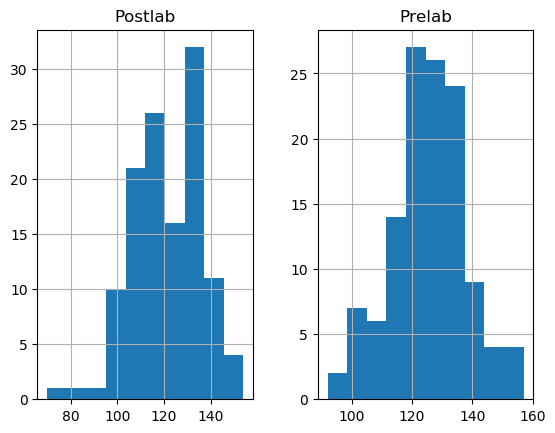

In [62]:
pre_post_lab.hist()
plt.show()

In [57]:
prelab_q.head()

Q1                       Q2                      ...   Q4             Q5  \
     1    2    3    4    5    1    2    3    4    5  ...    5    6    7    1   
1  4.0  3.0  3.0  4.0  2.0  4.0  5.0  5.0  4.0  4.0  ...  5.0  3.0  4.0  3.0   
2  4.0  2.0  4.0  2.0  3.0  4.0  4.0  4.0  3.0  4.0  ...  5.0  5.0  5.0  4.0   
3  1.0  1.0  1.0  1.0  1.0  4.0  4.0  4.0  5.0  5.0  ...  5.0  5.0  4.0  5.0   
4  2.0  3.0  3.0  2.0  3.0  4.0  3.0  1.0  2.0  3.0  ...  3.0  2.0  3.0  2.0   
9  3.0  2.0  2.0  3.0  2.0  3.0  2.0  3.0  4.0  4.0  ...  2.0  4.0  3.0  4.0   

                                 
     2    3    4    5    6    7  
1  3.0  3.0  3.0  4.0  2.0  4.0  
2  4.0  4.0  5.0  5.0  4.0  5.0  
3  4.0  5.0  5.0  5.0  5.0  4.0  
4  4.0  2.0  4.0  4.0  2.0  3.0  
9  4.0  4.0  3.0  4.0  3.0  2.0  

[5 rows x 34 columns]

In [56]:
postlab_q.head()

Q1                       Q2                      ...   Q4             Q5  \
     1    2    3    4    5    1    2    3    4    5  ...    5    6    7    1   
1  3.0  3.0  4.0  2.0  4.0  4.0  5.0  4.0  3.0  2.0  ...  5.0  4.0  3.0  3.0   
2  3.0  4.0  2.0  1.0  2.0  5.0  5.0  3.0  3.0  3.0  ...  4.0  4.0  5.0  4.0   
3  2.0  4.0  3.0  1.0  1.0  4.0  4.0  5.0  5.0  5.0  ...  5.0  5.0  5.0  4.0   
4  1.0  3.0  4.0  2.0  1.0  4.0  2.0  1.0  3.0  4.0  ...  5.0  4.0  4.0  2.0   
9  4.0  3.0  3.0  2.0  3.0  4.0  4.0  4.0  2.0  4.0  ...  3.0  3.0  4.0  2.0   

                                 
     2    3    4    5    6    7  
1  4.0  4.0  3.0  4.0  3.0  5.0  
2  4.0  4.0  3.0  3.0  3.0  4.0  
3  4.0  5.0  5.0  5.0  5.0  4.0  
4  4.0  4.0  5.0  5.0  2.0  1.0  
9  3.0  4.0  3.0  3.0  3.0  3.0  

[5 rows x 34 columns]

(123, 34)